In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({'axes.labelsize': '22',
                     'xtick.labelsize':'18',
                     'ytick.labelsize': '18',
                     'legend.fontsize': '18',
                     'figure.figsize': (8, 8),
                     'font.size': 22,
                     })

def increase_linewidth(ax):
    lines = ax.get_lines()
    for line in lines:
        line.set_linewidth(3)
    if len(lines) > 1:
        leg = ax.legend()
        leg_lines = leg.get_lines()
        plt.setp(leg_lines, linewidth=5)

In [3]:
model_directory = "models/answer_questions_two_networks/"
data_directory = "answer_questions_two_networks_plots/"

In [4]:
stats = pd.read_hdf(data_directory+"training_data.h5", "training_data")

In [5]:
stats["Episode"] = stats.index

In [6]:
stats.head()

,control,correct_answer,episode_length,question_loss,value_loss,seed,Episode
0,0,False,633,0,"tensor(0.0703, device='cuda:0')",0,0
1,1,False,607,0,"tensor(0.0699, device='cuda:0')",0,1
2,0,False,601,0,"tensor(0.0636, device='cuda:0')",0,2
3,0,True,631,0,"tensor(0.0586, device='cuda:0')",0,3
4,0,False,611,0,"tensor(0.0549, device='cuda:0')",0,4


In [7]:
stats["none"] = (stats.control == 0)
stats["one_ball"] = (stats.control == 1)
stats["two_balls"] = (stats.control == 2)

In [8]:
np.corrcoef(stats.control, stats.correct_answer)

array([[1.        , 0.00683947],
       [0.00683947, 1.        ]])

In [9]:
WINDOW_SIZE = 100

In [10]:
columns = ["none", "one_ball", "two_balls", "episode_length", "value_loss", "question_loss", "correct_answer"]
rolling_stats = []

for seed, df in stats.groupby("seed"):
    rolling_df = pd.DataFrame(columns=columns)
    for column in columns:
        rolling_df[column] = df[column].rolling(window=WINDOW_SIZE).mean()
    # rolling_df.control.plot()
    """plt.show()
    rolling_df.value_loss.plot()
    plt.show()
    rolling_df.episode_length.plot()
    plt.show()"""
    rolling_stats.append(rolling_df)
rolling_stats = pd.concat(rolling_stats)

In [11]:
rolling_stats["Episode"] = rolling_stats.index

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


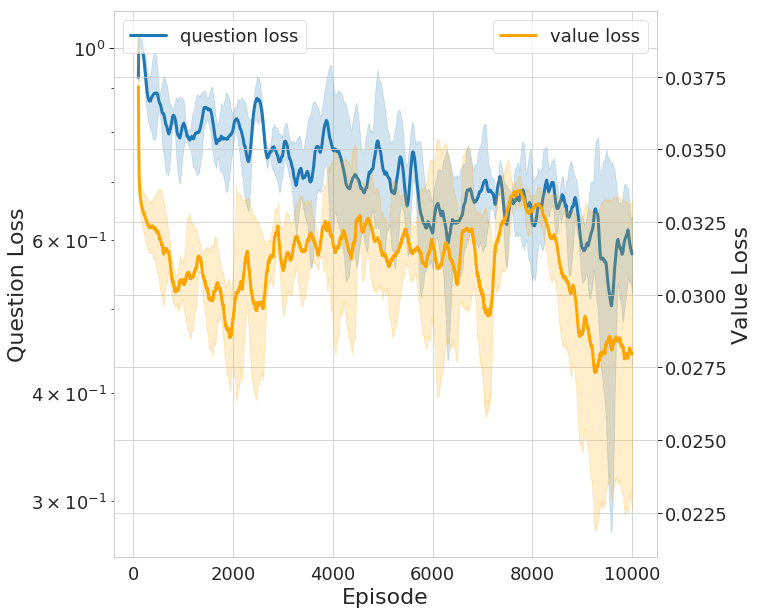

In [12]:
plt.figure(figsize=(11, 9))
ax = sns.lineplot(x="Episode", y="question_loss", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="question loss")
plt.legend(loc=2)
plt.ylabel("Question Loss")
ax.set_yscale("log")
ax2 = ax.twinx()
sns.lineplot(x="Episode", y="value_loss", markers=True, data=rolling_stats, linewidth=3, ci="sd", ax=ax2, c="orange", label="value loss")
plt.ylabel("Value Loss")
# ax2.set_yscale("log")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"losses.pdf")

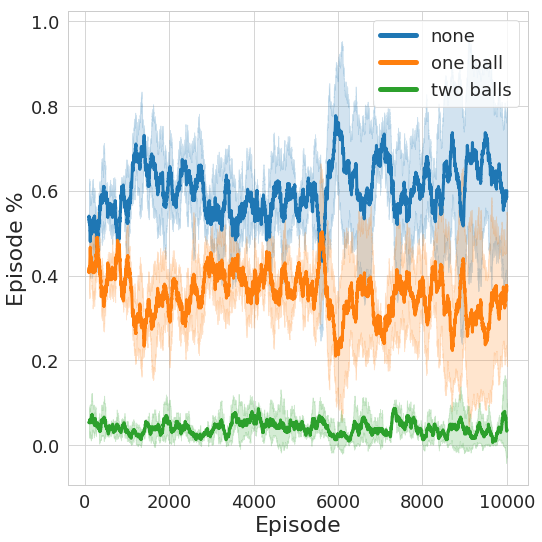

In [13]:
rolling_stats["Episode"] = rolling_stats.index
ax = sns.lineplot(x="Episode", y="none", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="none")
ax = sns.lineplot(x="Episode", y="one_ball", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="one ball")
ax = sns.lineplot(x="Episode", y="two_balls", markers=True, data=rolling_stats, linewidth=3, ci="sd", label="two balls")

increase_linewidth(ax)
plt.ylabel("Episode %")
plt.tight_layout()
plt.savefig(data_directory+"control.pdf")

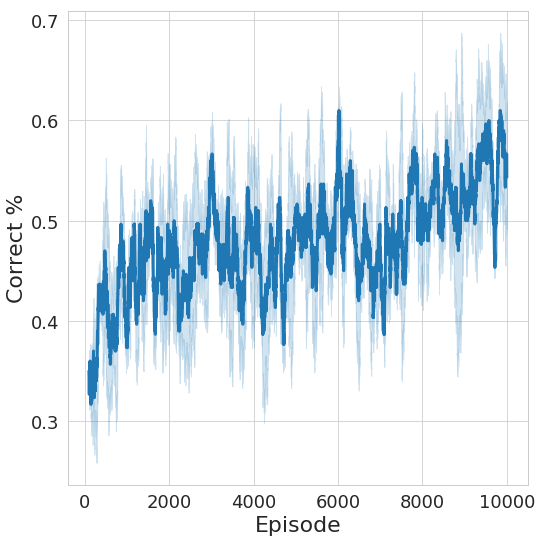

In [14]:
ax = sns.lineplot(x="Episode", y="correct_answer", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Correct %")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"correct.pdf")

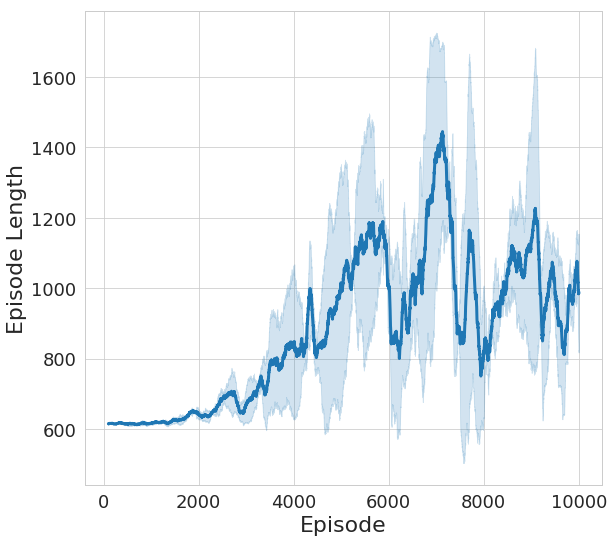

In [15]:
plt.figure(figsize=(9, 8))
ax = sns.lineplot(x="Episode", y="episode_length", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Episode Length")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"episode_length.pdf")

# Validation data

In [16]:
stats = pd.read_hdf(data_directory+"validation_data.h5", "validation_data")

In [17]:
stats

,avg_answers,avg_control,avg_episode_length,std_answers,std_control,std_episode_length,seed,episode
0,0.0,0.5,1799.0,0.0,0.5,0.0,0,9000
0,0.0,0.0,759.0,0.0,0.0,158.0,0,6000
0,1.0,0.0,1089.0,0.0,0.0,80.0,0,4000
0,0.5,0.0,1799.0,0.5,0.0,0.0,0,7000
0,0.0,0.0,601.0,0.0,0.0,0.0,0,0
0,0.5,0.0,1200.0,0.5,0.0,599.0,0,2000
0,0.5,0.5,1291.0,0.5,0.5,206.0,0,8000
0,0.5,0.0,1208.0,0.5,0.0,591.0,0,1000
0,0.0,0.5,1269.0,0.0,0.5,530.0,0,5000
0,0.5,0.0,1799.0,0.5,0.0,0.0,0,3000


In [18]:
stats.episode = stats.episode.astype(int)
stats.seed = stats.seed.astype(int)

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


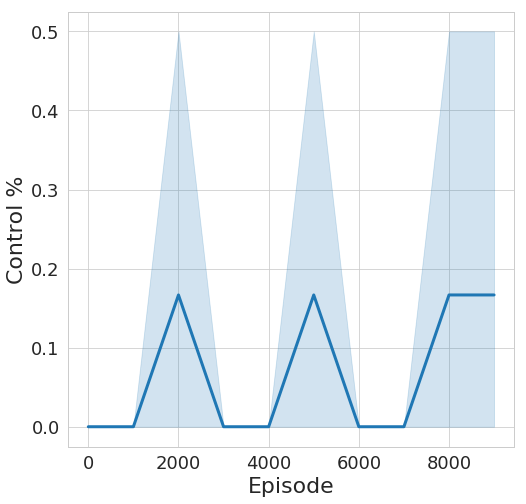

In [19]:
# plt.xticks(ticks=np.arange(0, 35000, 5000), labels=np.arange(0, 35000, 5000))
ax = sns.lineplot(x="episode", y="avg_control", data=stats, linewidth=3)
plt.ylabel("Control %")
plt.xlabel("Episode")
increase_linewidth(ax)
plt.savefig(data_directory+"validation_control.pdf")

In [20]:
stats.sort_values(by="avg_control", ascending=False).iloc[0]

avg_answers              0.0
avg_control              0.5
avg_episode_length    1799.0
std_answers              0.0
std_control              0.5
std_episode_length       0.0
seed                     0.0
episode               9000.0
Name: 0, dtype: float64

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


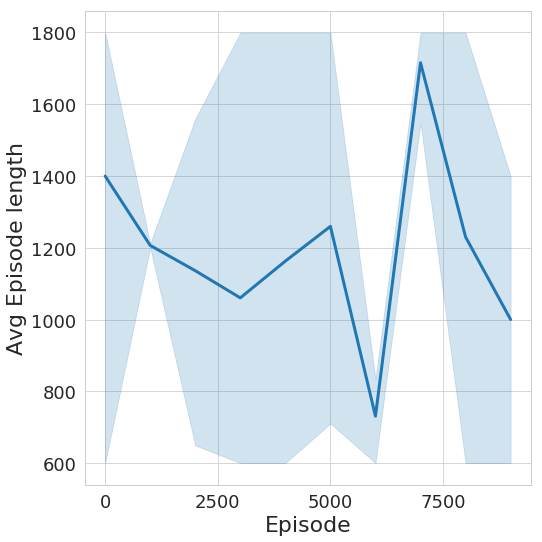

In [21]:
plt.xticks(ticks=np.arange(0, 10000, 2500), labels=np.arange(0, 10000, 2500))
ax = sns.lineplot(x="episode", y="avg_episode_length", data=stats, linewidth=3)
plt.ylabel("Avg Episode length")
plt.xlabel("Episode")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"validation_ep_length.pdf")